<a href="https://colab.research.google.com/github/Riazifar-M/project-6220/blob/main/Principal_Component_Analysis_and_Diagnosis_of_Liver_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and diagnosis of Liver cancer**

**Install Pycaret**

In [ ]:
!pip install pycaret==2.3.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The “Breast Cancer diagnosis Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about tumor attributes to diagnosed it as benign or malignant for breast cancer.

There are 5 attributes with 569 entries and one column for classification. 
**0 represents Benign and 1 represents Malignant.**


All attributes are numerical and they are listed bellow:

1. mean_radius = MR
2. mean_texture = MT
3. mean_perimeter = MP
4. mean_area = MA
5. mean_smoothness = MS
6. diagnosis (Label)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/theodoravalerie/breast-cancer-data





In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Riazifar-M/project-6220/main/Liver%20Cancer%205.0.csv')
df.head(25)

ALT       AST       ALP      TB      INR      SA  class
0   0.09092  0.065920  0.027490  0.1675  0.06043  0.2636      0
1   0.07698  0.047510  0.033840  0.1809  0.05718  0.2338      0
2   0.04966  0.016570  0.011150  0.1495  0.05888  0.4062      0
3   0.06059  0.018570  0.017230  0.1353  0.05953  0.1872      0
4   0.04751  0.019720  0.013490  0.1868  0.06110  0.2273      0
5   0.14850  0.177200  0.106000  0.2092  0.06310  0.8337      1
6   0.07081  0.052530  0.033340  0.1616  0.05684  0.3105      1
7   0.05473  0.030360  0.022780  0.1920  0.05907  0.3249      0
8   0.12670  0.132300  0.089940  0.1917  0.05961  0.7275      1
9   0.13650  0.129300  0.081230  0.2027  0.06758  0.4226      1
10  0.03789  0.000692  0.004167  0.1819  0.05501  0.4040      0
11  0.05272  0.020610  0.007799  0.1683  0.07187  0.1559      0
12  0.08061  0.010840  0.012900  0.2743  0.06960  0.5158      0
13  0.08963  0.030000  0.009259  0.1828  0.06757  0.3582      0
14  0.20080  0.213500  0.086530  0.1949  0.07292  0.7036      1
15  0.08751  0.059880  0.021800  0.2341  0.06963  0.4098      0
16  0.12620  0.112800  0.068730  0.1905  0.06590  0.4255      1
17  0.14790  0.126700  0.090290  0.1953  0.06654  0.3577      1
18  0.07773  0.021720  0.015040  0.1717  0.06899  0.2351      0
19  0.04701  0.037090  0.022300  0.1516  0.05667  0.2727      0
20  0.14130  0.313000  0.043750  0.2111  0.08046  0.3274      0
21  0.05234  0.036530  0.028640  0.1590  0.05653  0.2368      0
22  0.10290  0.108000  0.079510  0.1582  0.05461  0.7888      1
23  0.15310  0.086060  0.028720  0.1902  0.08980  0.5262      0
24  0.18300  0.169200  0.079440  0.1927  0.06487  0.5907      1

In [ ]:
len(df.index)

250

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ALT     250 non-null    float64
 1   AST     250 non-null    float64
 2   ALP     250 non-null    float64
 3   TB      250 non-null    float64
 4   INR     250 non-null    float64
 5   SA      250 non-null    float64
 6   class   250 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 13.8 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

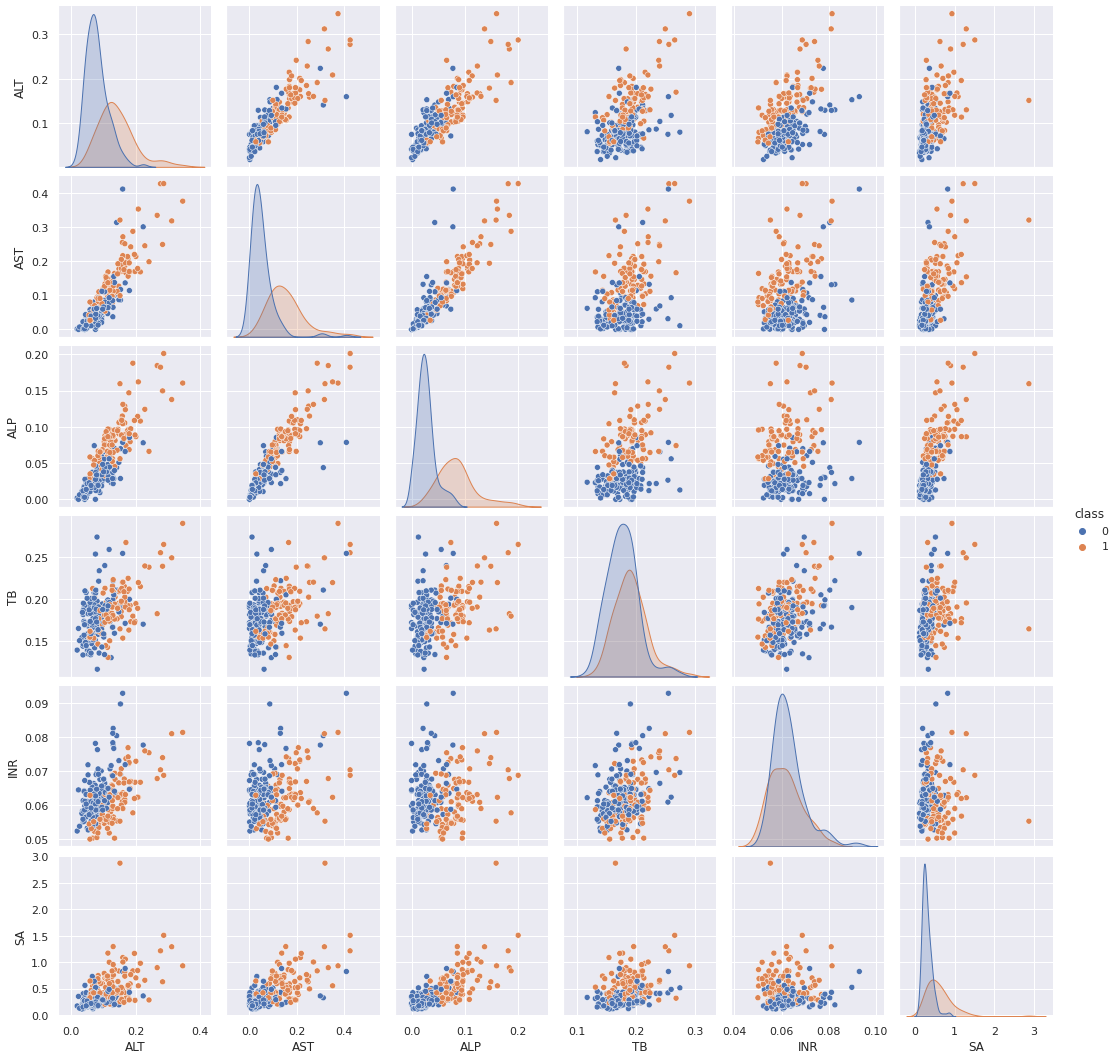

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

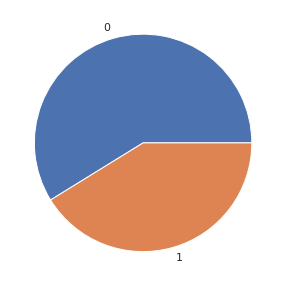

In [ ]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['class'])
X.head(10)

ALT      AST      ALP      TB      INR      SA
0  0.09092  0.06592  0.02749  0.1675  0.06043  0.2636
1  0.07698  0.04751  0.03384  0.1809  0.05718  0.2338
2  0.04966  0.01657  0.01115  0.1495  0.05888  0.4062
3  0.06059  0.01857  0.01723  0.1353  0.05953  0.1872
4  0.04751  0.01972  0.01349  0.1868  0.06110  0.2273
5  0.14850  0.17720  0.10600  0.2092  0.06310  0.8337
6  0.07081  0.05253  0.03334  0.1616  0.05684  0.3105
7  0.05473  0.03036  0.02278  0.1920  0.05907  0.3249
8  0.12670  0.13230  0.08994  0.1917  0.05961  0.7275
9  0.13650  0.12930  0.08123  0.2027  0.06758  0.4226

In [ ]:
X.describe().transpose()

count      mean       std      min       25%       50%       75%      max
ALT  250.0  0.104789  0.053709  0.01938  0.066805  0.094535  0.130450  0.34540
AST  250.0  0.092963  0.083527  0.00000  0.031672  0.065925  0.132250  0.42680
ALP  250.0  0.050685  0.039161  0.00000  0.021747  0.037135  0.074868  0.20120
TB   250.0  0.182366  0.028129  0.11670  0.162425  0.181350  0.195850  0.29060
INR  250.0  0.062441  0.007010  0.04996  0.057458  0.061210  0.065537  0.09296
SA   250.0  0.424584  0.290619  0.11530  0.240925  0.334000  0.518200  2.87300

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

ALT       AST       ALP        TB       INR        SA
0 -0.258749 -0.324416 -0.593486 -0.529545 -0.287428 -0.555046
1 -0.518815 -0.545265 -0.431010 -0.052221 -0.751982 -0.657792
2 -1.028500 -0.916425 -1.011574 -1.170728 -0.508985 -0.063385
3 -0.824589 -0.892433 -0.856007 -1.676550 -0.416074 -0.818461
4 -1.068611 -0.878638 -0.951701  0.157945 -0.191659 -0.680203
5  0.815470  1.010513  1.415332  0.955861  0.094220  1.410564
6 -0.633923 -0.485044 -0.443804 -0.739711 -0.800581 -0.393343
7 -0.933914 -0.750999 -0.714000  0.343175 -0.481826 -0.343694
8  0.408767  0.471887  1.004409  0.332489 -0.404639  1.044404
9  0.591596  0.435898  0.781548  0.724322  0.734589 -0.006841

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
ALT  250.0 -9.947598e-17  1.002006 -1.593407 -0.708641 -0.191307  0.478727   
AST  250.0 -1.243450e-16  1.002006 -1.115201 -0.735254 -0.324356  0.471287   
ALP  250.0  8.881784e-18  1.002006 -1.296867 -0.740418 -0.346702  0.618752   
TB   250.0  9.876544e-16  1.002006 -2.339105 -0.710323 -0.036191  0.480317   
INR  250.0 -6.679102e-16  1.002006 -1.784005 -0.712316 -0.175936  0.442635   
SA   250.0 -2.557954e-16  1.002006 -1.066360 -0.633226 -0.312319  0.322772   

          max  
ALT  4.488858  
AST  4.004747  
ALP  3.851194  
TB   3.855430  
INR  4.362392  
SA   8.441733

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

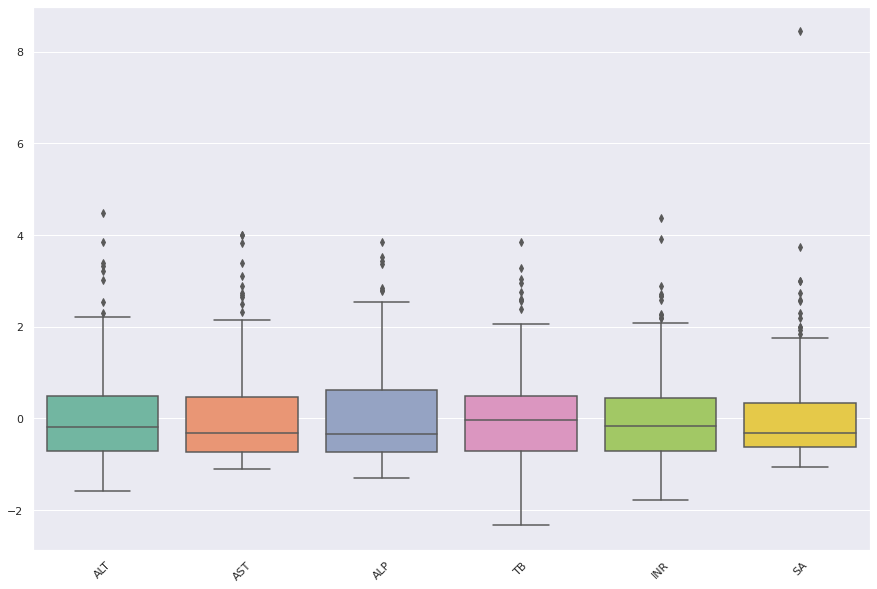

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

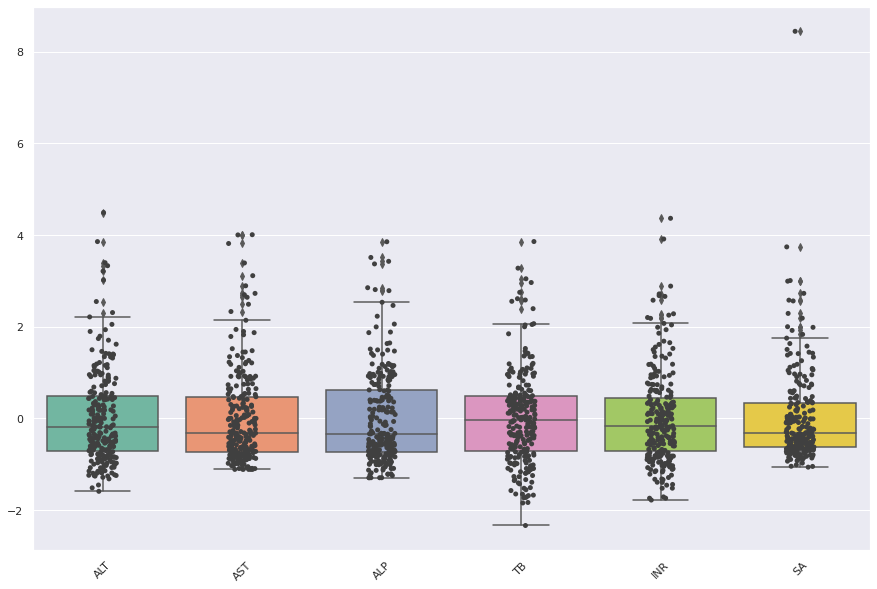

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

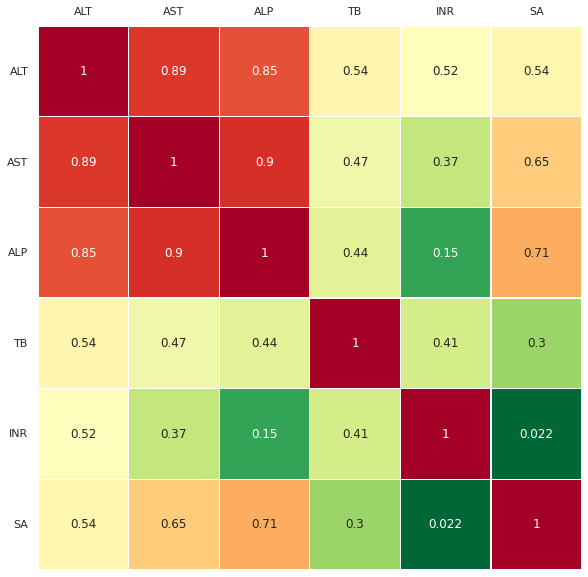

In [ ]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

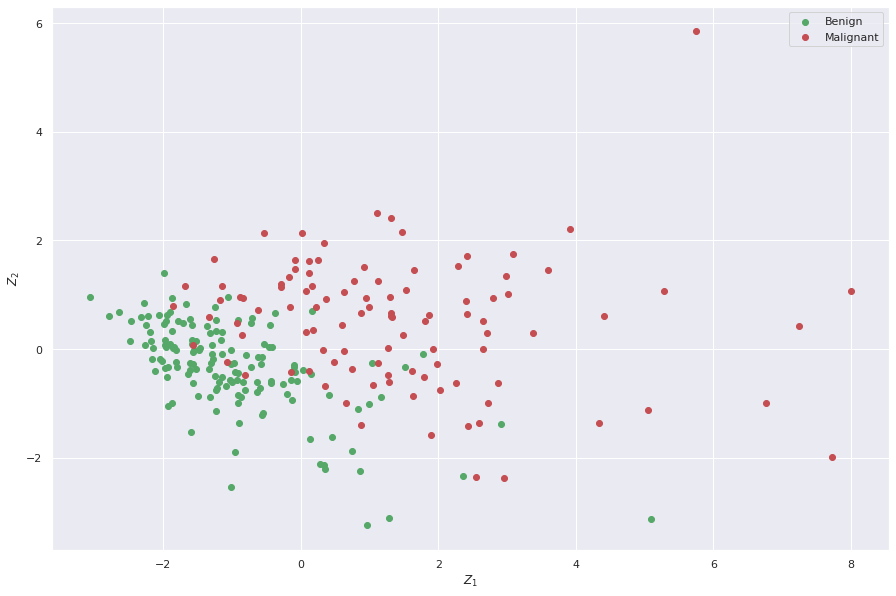

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 0.48640368, -0.10531329, -0.2063149 , -0.25296499, -0.6568362 ,
        -0.46295751],
       [ 0.48821497,  0.08576631, -0.20486635, -0.20748801,  0.73915466,
        -0.35059831],
       [ 0.47214125,  0.28128386, -0.06447517, -0.32030034, -0.09007341,
         0.76360949],
       [ 0.33015233, -0.3634254 ,  0.86878435, -0.03935923,  0.05029933,
        -0.00748283],
       [ 0.23640703, -0.7441059 , -0.38429337,  0.40460787,  0.06678357,
         0.27307355],
       [ 0.37047455,  0.46546862,  0.09401728,  0.790638  , -0.08434048,
        -0.07089823]])

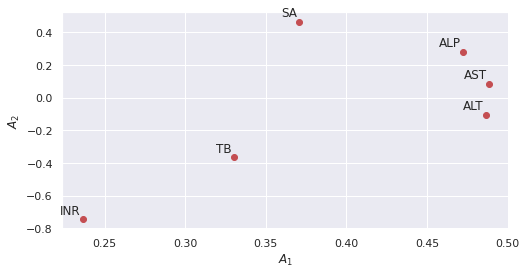

In [ ]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


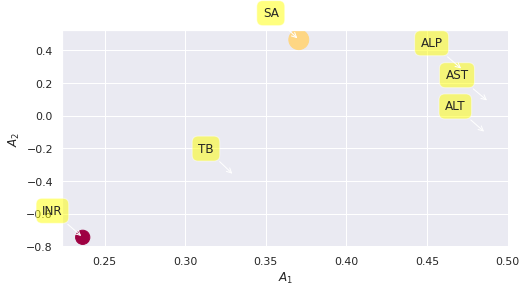

In [ ]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([3.75952225, 1.1609501 , 0.58304565, 0.36852307, 0.09530062,
       0.05675469])

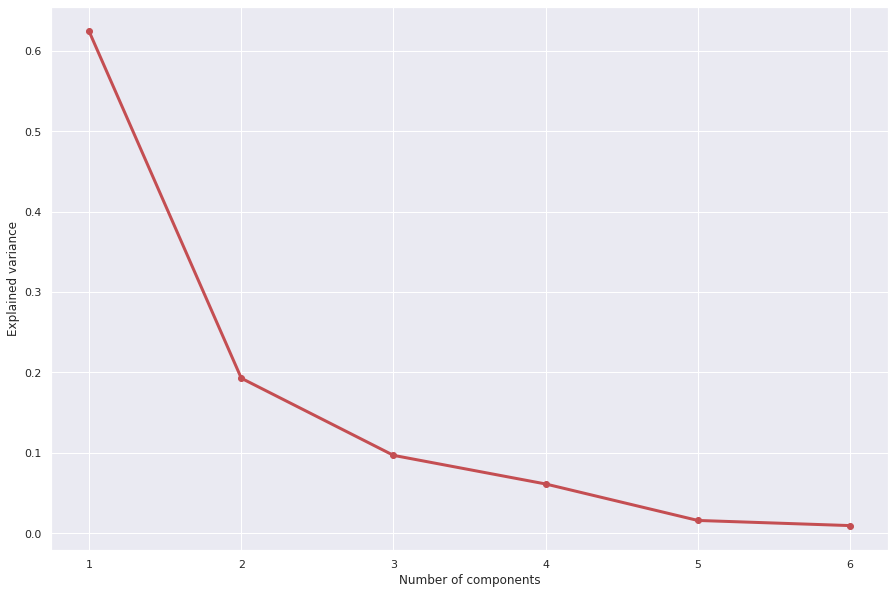

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

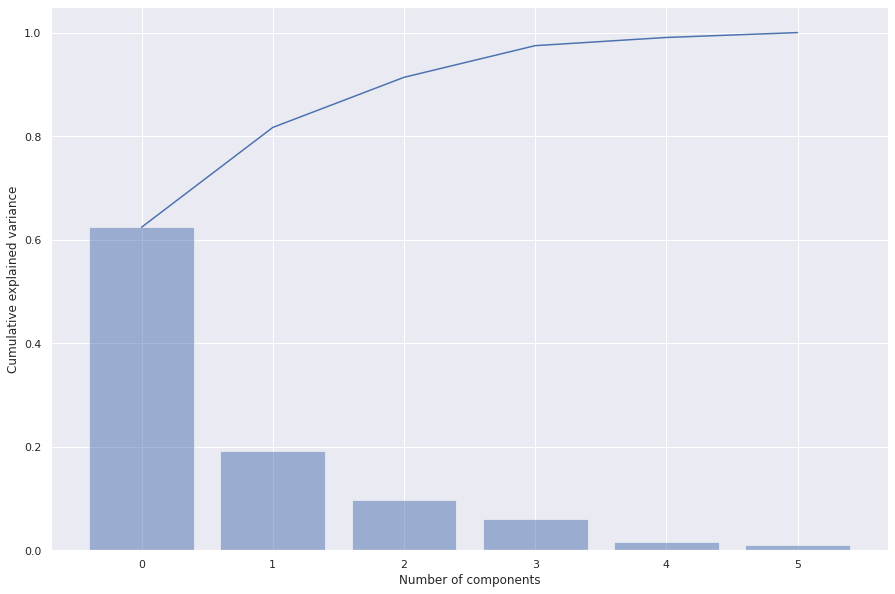

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-1.95414933e-02,  1.58987556e-01,  5.19883771e-01,  3.07454650e-01,
       -4.61916233e-01,  6.37978022e-01,  5.81783438e-01, -9.30611925e-02,
        9.46343964e-01, -6.18113898e-01,  4.65065764e-01, -1.53280770e+00,
       -2.11415357e+00, -9.90849468e-01, -6.35703346e-01, -1.66609023e+00,
       -3.63538190e-01, -4.75721572e-01, -1.13927676e+00,  6.20076535e-01,
       -2.33976153e+00,  5.16136592e-01,  1.95690519e+00, -3.10842060e+00,
        6.16932791e-03, -4.28315589e-01,  1.53886326e-02,  1.61684693e+00,
       -1.11306588e+00,  2.85434568e-01, -1.99848758e+00, -9.11977829e-02,
       -1.22326836e+00, -1.00837890e+00,  1.07284928e+00,  4.90967896e-03,
       -5.72373029e-01,  5.87473848e-01,  3.43967048e-01,  9.42064913e-01,
       -6.19925452e-01, -2.54051566e-01,  3.18512269e-01,  3.11186741e-01,
        1.39153974e+00,  4.26444396e-01,  2.50433248e-01,  1.07925604e+00,
       -7.64387684e-01, -5.12146714e-01, -5.23757296e-01, -4.05527361e-01,
        7.15982283e-01, -

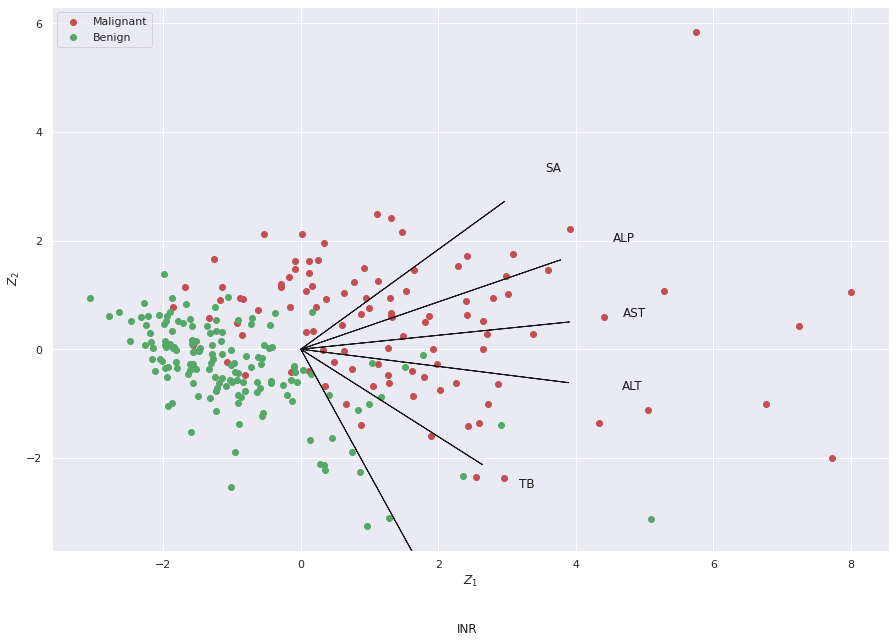

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=c01cc5a9f21601bc53e165dbdf32c323885b7c58f6c315c121894fc9669998cb
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=d62f354cd09e50e816ddeea168db7a5d1cc89c93d073aed26f2571c0155a8f43
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3       PC4
0   -1.012862 -0.019541 -0.243677 -0.211433
1   -1.160767  0.158988  0.428304 -0.439847
2   -1.955613  0.519884 -0.362309  0.564355
3   -2.196037  0.307455 -0.965469 -0.081525
4   -1.643239 -0.461916  0.608757  0.135901
..        ...       ...       ...       ...
245 -1.559158 -0.026560  0.773566 -0.285035
246 -1.616739 -0.265526 -0.245498 -0.166644
247 -1.896435  0.095467 -0.182892 -0.055568
248 -2.272530  0.075537 -0.642478  0.025301
249 -0.933761  0.482896 -0.221675  1.161677

[250 rows x 4 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [250] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [250] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f245dac88b0>)

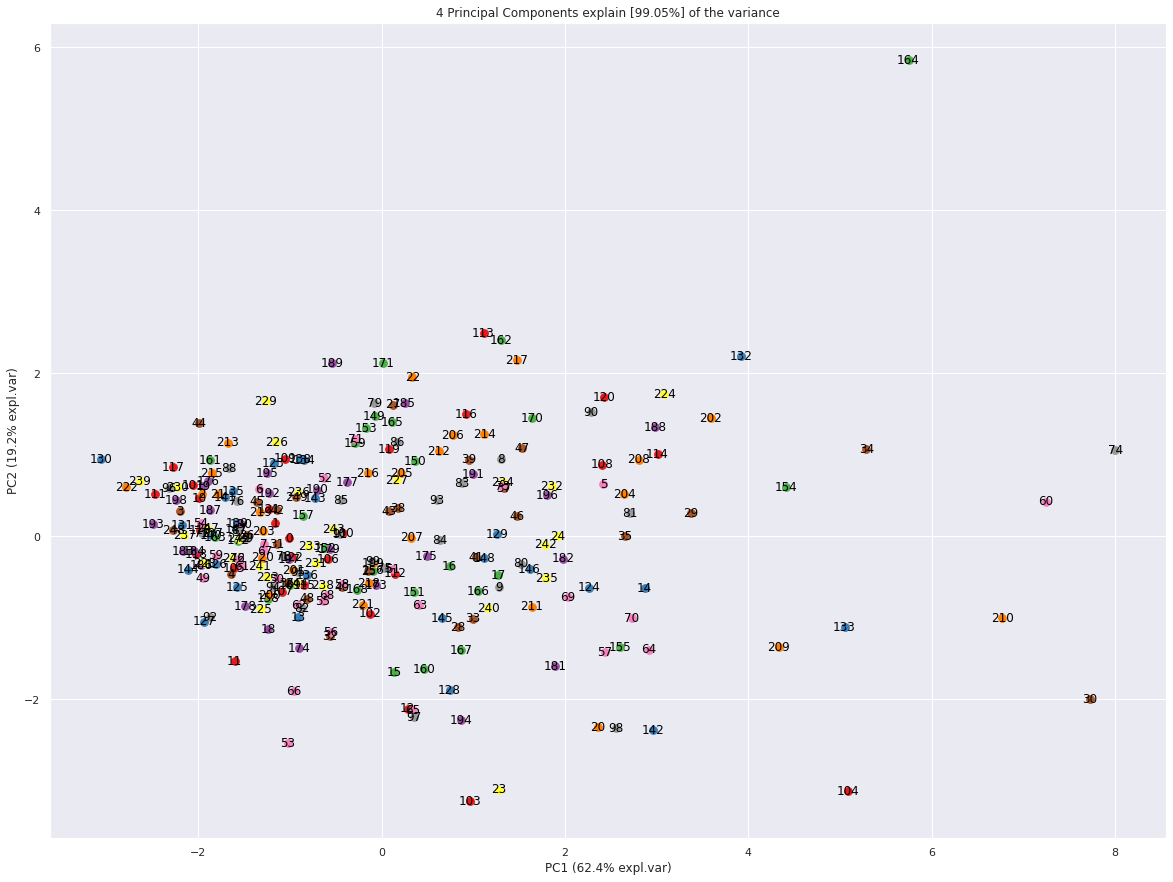

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4
ALT  0.486404 -0.105313 -0.206315 -0.252965
AST  0.488215  0.085766 -0.204866 -0.207488
ALP  0.472141  0.281284 -0.064475 -0.320300
TB   0.330152 -0.363425  0.868784 -0.039359
INR  0.236407 -0.744106 -0.384293  0.404608
SA   0.370475  0.465469  0.094017  0.790638

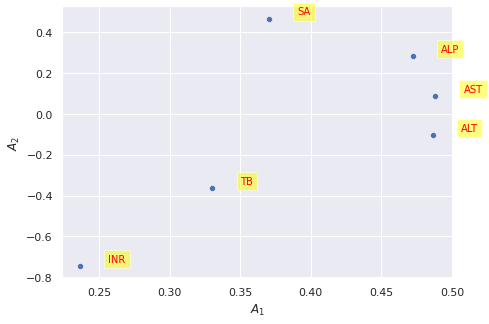

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

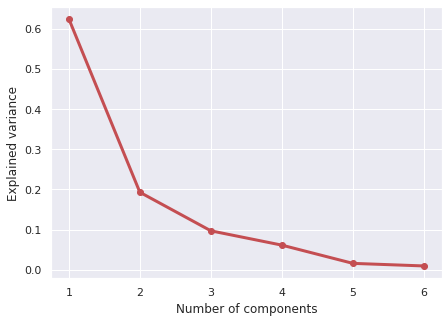

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

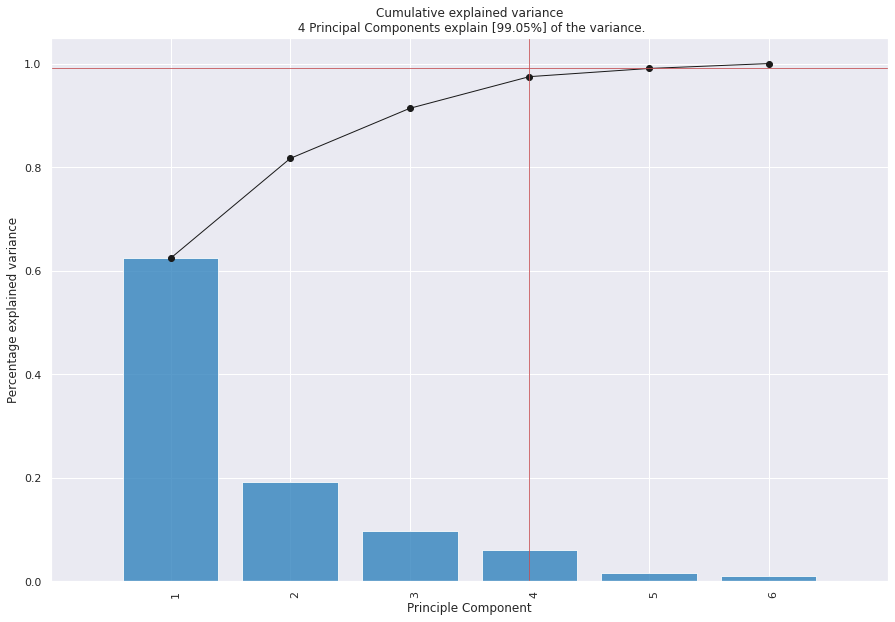

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [250] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [250] unique colors! Available unique colors: [9].


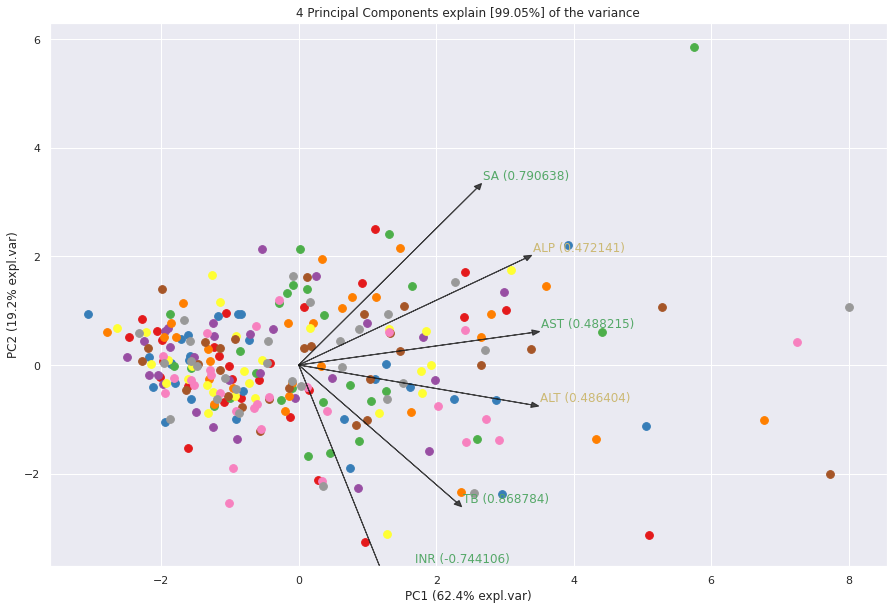

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2462d037c0>)

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [250] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [250] unique colors! Available unique colors: [9].


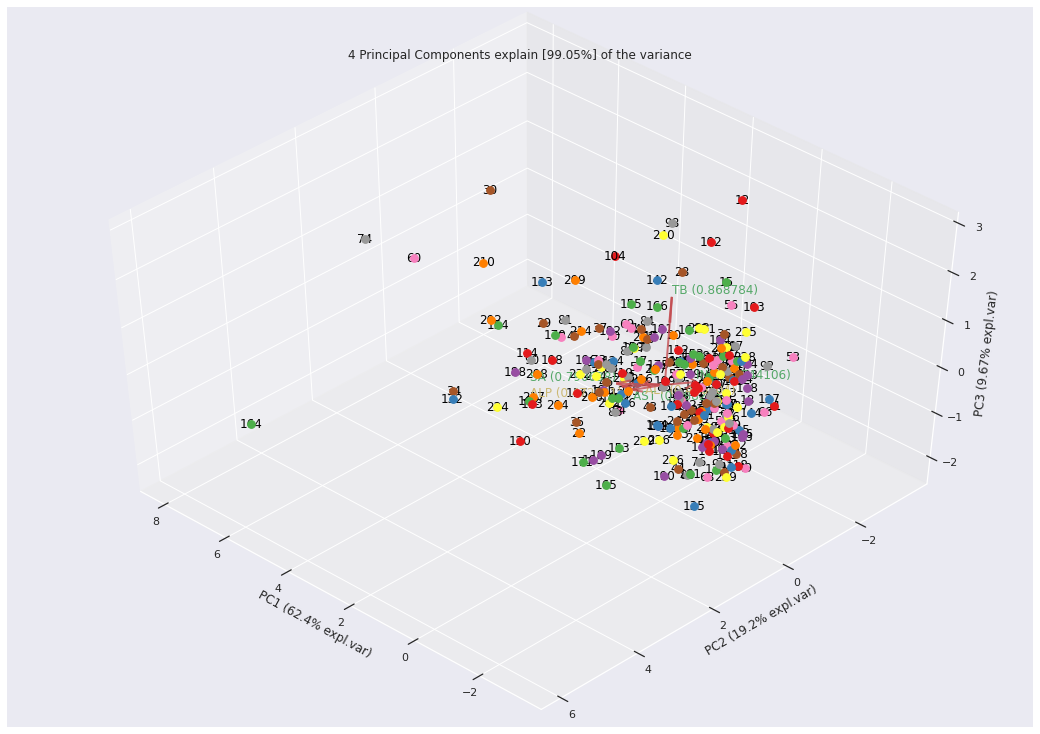

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f24634472e0>)

In [ ]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. 
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (225, 7)
Unseen Data For Predictions: (25, 7)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (225, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (157, 6)
12                    Transformed Test Set           (68, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              fab2
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.8975  0.9631  0.8833  0.8679   
nb                            Naive Bayes    0.8913  0.9331  0.8000  0.9274   
rf               Random Forest Classifier    0.8908  0.9522  0.8667  0.8679   
lightgbm  Light Gradient Boosting Machine    0.8850  0.9387  0.8667  0.8560   
gbc          Gradient Boosting Classifier    0.8788  0.9278  0.8667  0.8431   
lda          Linear Discriminant Analysis    0.8788  0.9556  0.7833  0.9107   
qda       Quadratic Discriminant Analysis    0.8717  0.9361  0.8333  0.8502   
dt               Decision Tree Classifier    0.8529  0.8428  0.8000  0.8294   
knn                K Neighbors Classifier    0.8462  0.8947  0.7833  0.8221   
svm                   SVM - Linear Kernel    0.8400  0.0000  0.8167  0.8307   
ada                  Ada Boost Classifier    0.8217  0.9112  0.7357  0.8086   
ridge                    Ridge Classifier    0.7754  0.0000  0.5071  0.8740   
lr                    Logistic Regression    0.7562  0.8883  0.4405  0.8667   
dummy                    Dummy Classifier    0.6112  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
et        0.8682  0.7847  0.7932     0.132  
nb        0.8423  0.7622  0.7823     0.017  
rf        0.8573  0.7696  0.7804     0.161  
lightgbm  0.8484  0.7568  0.7691     0.096  
gbc       0.8444  0.7458  0.7583     0.059  
lda       0.8232  0.7347  0.7560     0.010  
qda       0.8313  0.7287  0.7399     0.010  
dt        0.8020  0.6862  0.7006     0.016  
knn       0.7922  0.6710  0.6820     0.014  
svm       0.7978  0.6695  0.6975     0.013  
ada       0.7547  0.6161  0.6319     0.074  
ridge     0.6200  0.4841  0.5325     0.009  
lr        0.5697  0.4324  0.4848     0.251  
dummy     0.0000  0.0000  0.0000     0.009

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

 Create a Model

**Logistic Regresssion**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.8333  0.5000  0.7500  0.6000  0.4286  0.4472
1       0.7500  0.8167  0.3333  1.0000  0.5000  0.3846  0.4880
2       0.8125  0.9167  0.5000  1.0000  0.6667  0.5556  0.6202
3       0.7500  0.9167  0.3333  1.0000  0.5000  0.3846  0.4880
4       0.9375  1.0000  0.8333  1.0000  0.9091  0.8621  0.8704
5       0.7500  0.9000  0.5000  0.7500  0.6000  0.4286  0.4472
6       0.8125  1.0000  0.5714  1.0000  0.7273  0.6000  0.6547
7       0.6000  0.7963  0.1667  0.5000  0.2500  0.0625  0.0801
8       0.7333  0.9074  0.3333  1.0000  0.5000  0.3750  0.4804
9       0.6667  0.7963  0.3333  0.6667  0.4444  0.2424  0.2722
Mean    0.7562  0.8883  0.4405  0.8667  0.5697  0.4324  0.4848
SD      0.0850  0.0722  0.1741  0.1756  0.1684  0.2022  0.2019

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune the model**

In [ ]:
tuned_lr=tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.9167  0.5000  0.7500  0.6000  0.4286  0.4472
1       0.8125  0.8833  0.6667  0.8000  0.7273  0.5862  0.5919
2       0.8750  0.9333  0.6667  1.0000  0.8000  0.7143  0.7454
3       0.8750  0.9667  0.6667  1.0000  0.8000  0.7143  0.7454
4       0.8750  1.0000  1.0000  0.7500  0.8571  0.7500  0.7746
5       0.9375  0.9000  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.7333  0.8148  0.8333  0.6250  0.7143  0.4737  0.4910
8       0.8667  0.9259  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8000  0.8704  0.8333  0.7143  0.7692  0.5946  0.6001
Mean    0.8525  0.9211  0.7833  0.8496  0.7991  0.6838  0.7012
SD      0.0773  0.0552  0.1675  0.1348  0.1058  0.1639  0.1619

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lr

LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with K-nearest neighbour**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6875  0.8417  0.5000  0.6000  0.5455  0.3103  0.3133
1       0.8750  0.9333  0.8333  0.8333  0.8333  0.7333  0.7333
2       0.8750  0.8583  0.6667  1.0000  0.8000  0.7143  0.7454
3       0.8125  0.8833  0.6667  0.8000  0.7273  0.5862  0.5919
4       0.8750  0.9333  1.0000  0.7500  0.8571  0.7500  0.7746
5       0.9375  0.9417  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.7333  0.8148  0.6667  0.6667  0.6667  0.4444  0.4444
8       0.8667  0.8889  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8000  0.8519  0.8333  0.7143  0.7692  0.5946  0.6001
Mean    0.8462  0.8947  0.7833  0.8221  0.7922  0.6710  0.6820
SD      0.0872  0.0537  0.1675  0.1368  0.1215  0.1886  0.1911

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune model with K-nearest neighbour**

In [ ]:
tuned_knn = tune_model(knn)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.9000  0.5000  0.7500  0.6000  0.4286  0.4472
1       0.8750  0.9333  0.6667  1.0000  0.8000  0.7143  0.7454
2       0.8750  0.8500  0.6667  1.0000  0.8000  0.7143  0.7454
3       0.8750  0.9667  0.6667  1.0000  0.8000  0.7143  0.7454
4       0.8750  0.9667  1.0000  0.7500  0.8571  0.7500  0.7746
5       0.9375  0.9500  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8000  0.8704  0.8333  0.7143  0.7692  0.5946  0.6001
8       0.8667  0.9444  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8667  0.8241  0.8333  0.8333  0.8333  0.7222  0.7222
Mean    0.8721  0.9206  0.7833  0.8905  0.8183  0.7215  0.7397
SD      0.0639  0.0542  0.1675  0.1161  0.0986  0.1425  0.1391

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

**Evaluate model with K-nearest neighbour**

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with Quadratic Discriminant Analysis**

In [ ]:
qda=create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  0.9500  1.0000  0.8571  0.9231  0.8710  0.8783
1       0.8750  0.8833  0.6667  1.0000  0.8000  0.7143  0.7454
2       0.8750  0.9667  0.8333  0.8333  0.8333  0.7333  0.7333
3       0.8750  0.9667  0.8333  0.8333  0.8333  0.7333  0.7333
4       0.8125  0.9167  0.8333  0.7143  0.7692  0.6129  0.6181
5       0.8750  0.9000  1.0000  0.7500  0.8571  0.7500  0.7746
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8000  0.9259  0.8333  0.7143  0.7692  0.5946  0.6001
8       0.8667  0.9630  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8000  0.8889  0.6667  0.8000  0.7273  0.5714  0.5774
Mean    0.8717  0.9361  0.8333  0.8502  0.8313  0.7287  0.7399
SD      0.0589  0.0370  0.1291  0.1084  0.0762  0.1230  0.1220

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


**Tune QDA Model**

In [ ]:
tuned_qda=tune_model(qda)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6875  0.8167  0.1667  1.0000  0.2857  0.2000  0.3333
1       0.6875  0.7500  0.1667  1.0000  0.2857  0.2000  0.3333
2       0.6875  0.8667  0.1667  1.0000  0.2857  0.2000  0.3333
3       0.6875  0.8667  0.1667  1.0000  0.2857  0.2000  0.3333
4       0.6875  1.0000  0.1667  1.0000  0.2857  0.2000  0.3333
5       0.5625  0.9000  0.0000  0.0000  0.0000 -0.1200 -0.2000
6       0.6250  1.0000  0.1429  1.0000  0.2500  0.1579  0.2928
7       0.6667  0.7963  0.1667  1.0000  0.2857  0.1935  0.3273
8       0.6667  0.9074  0.1667  1.0000  0.2857  0.1935  0.3273
9       0.6000  0.7593  0.1667  0.5000  0.2500  0.0625  0.0801
Mean    0.6558  0.8663  0.1476  0.8500  0.2500  0.1487  0.2494
SD      0.0425  0.0842  0.0497  0.3202  0.0845  0.0984  0.1673

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate QDA Model**

In [ ]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (225, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (157, 3)
12                    Transformed Test Set           (68, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              52e4
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

# **Comparing Models**

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.9108  0.9606  0.8667  0.9115   
qda       Quadratic Discriminant Analysis    0.8979  0.9357  0.8000  0.9314   
lr                    Logistic Regression    0.8913  0.9494  0.8000  0.9181   
et                 Extra Trees Classifier    0.8913  0.9415  0.8333  0.8979   
rf               Random Forest Classifier    0.8667  0.9293  0.8000  0.8613   
lightgbm  Light Gradient Boosting Machine    0.8596  0.9369  0.7833  0.8565   
ada                  Ada Boost Classifier    0.8592  0.9356  0.8024  0.8677   
gbc          Gradient Boosting Classifier    0.8592  0.9306  0.8190  0.8360   
nb                            Naive Bayes    0.8583  0.9370  0.7000  0.9264   
ridge                    Ridge Classifier    0.8525  0.0000  0.6833  0.9131   
lda          Linear Discriminant Analysis    0.8525  0.9457  0.6833  0.9131   
svm                   SVM - Linear Kernel    0.8329  0.0000  0.7833  0.8211   
dt               Decision Tree Classifier    0.8146  0.8078  0.7833  0.7714   
dummy                    Dummy Classifier    0.6112  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
knn       0.8801  0.8096  0.8199     0.038  
qda       0.8495  0.7746  0.7894     0.019  
lr        0.8416  0.7610  0.7767     0.022  
et        0.8509  0.7663  0.7817     0.219  
rf        0.8049  0.7076  0.7275     0.334  
lightgbm  0.8023  0.6952  0.7114     0.019  
ada       0.8151  0.7031  0.7225     0.075  
gbc       0.8191  0.7042  0.7135     0.054  
nb        0.7716  0.6794  0.7110     0.012  
ridge     0.7624  0.6650  0.6939     0.019  
lda       0.7624  0.6650  0.6939     0.011  
svm       0.7703  0.6436  0.6698     0.014  
dt        0.7555  0.6084  0.6251     0.016  
dummy     0.0000  0.0000  0.0000     0.009

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


# **Best model with PCA**

In [ ]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# **Tune Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9500  0.6667  0.8000  0.7273  0.5862  0.5919
1       0.9375  0.9667  0.8333  1.0000  0.9091  0.8621  0.8704
2       0.9375  0.9667  0.8333  1.0000  0.9091  0.8621  0.8704
3       0.9375  1.0000  0.8333  1.0000  0.9091  0.8621  0.8704
4       0.9375  0.9250  1.0000  0.8571  0.9231  0.8710  0.8783
5       0.9375  0.9083  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  1.0000  0.8333  1.0000  0.9091  0.8571  0.8660
8       0.8667  0.9444  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8667  0.8889  0.8333  0.8333  0.8333  0.7222  0.7222
Mean    0.9167  0.9550  0.8500  0.9348  0.8843  0.8200  0.8286
SD      0.0502  0.0373  0.1167  0.0813  0.0729  0.1102  0.1079

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Best Model**

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
lr_pca = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9500  0.6667  0.8000  0.7273  0.5862  0.5919
1       0.8125  0.9167  0.5000  1.0000  0.6667  0.5556  0.6202
2       0.9375  1.0000  0.8333  1.0000  0.9091  0.8621  0.8704
3       0.8750  0.9667  0.6667  1.0000  0.8000  0.7143  0.7454
4       0.9375  0.9667  1.0000  0.8571  0.9231  0.8710  0.8783
5       0.9375  0.9167  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8667  0.9444  0.8333  0.8333  0.8333  0.7222  0.7222
8       0.8667  0.9444  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8667  0.8889  0.8333  0.8333  0.8333  0.7222  0.7222
Mean    0.8913  0.9494  0.8000  0.9181  0.8416  0.7610  0.7767
SD      0.0572  0.0340  0.1633  0.0832  0.0950  0.1313  0.1210

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# **Tune Model**

In [ ]:
tuned_lr_pca = tune_model(lr_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9500  0.6667  0.8000  0.7273  0.5862  0.5919
1       0.8125  0.9167  0.5000  1.0000  0.6667  0.5556  0.6202
2       0.9375  1.0000  0.8333  1.0000  0.9091  0.8621  0.8704
3       0.8750  0.9500  0.6667  1.0000  0.8000  0.7143  0.7454
4       0.9375  0.9667  1.0000  0.8571  0.9231  0.8710  0.8783
5       0.9375  0.9333  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8667  0.9444  0.8333  0.8333  0.8333  0.7222  0.7222
8       0.9333  0.9444  0.8333  1.0000  0.9091  0.8571  0.8660
9       0.8667  0.8889  0.8333  0.8333  0.8333  0.7222  0.7222
Mean    0.8979  0.9494  0.8167  0.9181  0.8525  0.7762  0.7895
SD      0.0578  0.0323  0.1572  0.0832  0.0958  0.1328  0.1230

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Model**

In [ ]:
tuned_lr_pca

LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create K-nearest neighbour Model**

In [ ]:
knn_pca = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9167  0.6667  0.8000  0.7273  0.5862  0.5919
1       0.9375  0.9750  0.8333  1.0000  0.9091  0.8621  0.8704
2       0.9375  0.9583  0.8333  1.0000  0.9091  0.8621  0.8704
3       0.9375  0.9917  0.8333  1.0000  0.9091  0.8621  0.8704
4       0.8750  0.9417  1.0000  0.7500  0.8571  0.7500  0.7746
5       0.9375  0.9333  1.0000  0.8571  0.9231  0.8710  0.8783
6       0.9375  1.0000  1.0000  0.8750  0.9333  0.8750  0.8819
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8667  0.9907  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8667  0.8981  0.8333  0.8333  0.8333  0.7222  0.7222
Mean    0.9108  0.9606  0.8667  0.9115  0.8801  0.8096  0.8199
SD      0.0513  0.0348  0.1247  0.0938  0.0735  0.1115  0.1084

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


# **Tune Model**

In [ ]:
tuned_knn_pca = tune_model(knn_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9500  0.6667  0.8000  0.7273  0.5862  0.5919
1       0.9375  0.9667  0.8333  1.0000  0.9091  0.8621  0.8704
2       0.9375  0.9667  0.8333  1.0000  0.9091  0.8621  0.8704
3       0.9375  1.0000  0.8333  1.0000  0.9091  0.8621  0.8704
4       0.9375  0.9250  1.0000  0.8571  0.9231  0.8710  0.8783
5       0.9375  0.9083  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  1.0000  0.8333  1.0000  0.9091  0.8571  0.8660
8       0.8667  0.9444  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8667  0.8889  0.8333  0.8333  0.8333  0.7222  0.7222
Mean    0.9167  0.9550  0.8500  0.9348  0.8843  0.8200  0.8286
SD      0.0502  0.0373  0.1167  0.0813  0.0729  0.1102  0.1079

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

# **Evaluate Model KNN**

In [ ]:
evaluate_model(tuned_knn_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Quadratic Discriminant Analysis Model**

In [ ]:
qda_pca = create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9500  0.6667  0.8000  0.7273  0.5862  0.5919
1       0.8125  0.8333  0.5000  1.0000  0.6667  0.5556  0.6202
2       0.9375  0.9833  0.8333  1.0000  0.9091  0.8621  0.8704
3       0.8750  0.9667  0.6667  1.0000  0.8000  0.7143  0.7454
4       0.9375  0.9667  1.0000  0.8571  0.9231  0.8710  0.8783
5       0.9375  0.9167  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  0.9630  0.8333  1.0000  0.9091  0.8571  0.8660
8       0.9333  0.8889  0.8333  1.0000  0.9091  0.8571  0.8660
9       0.8000  0.8889  0.6667  0.8000  0.7273  0.5714  0.5774
Mean    0.8979  0.9357  0.8000  0.9314  0.8495  0.7746  0.7894
SD      0.0651  0.0495  0.1633  0.0859  0.1048  0.1480  0.1389

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


# **Tune model**

In [ ]:
tuned_qda_pca = tune_model(qda_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9500  0.6667  0.8000  0.7273  0.5862  0.5919
1       0.8125  0.8833  0.5000  1.0000  0.6667  0.5556  0.6202
2       0.9375  0.9833  0.8333  1.0000  0.9091  0.8621  0.8704
3       0.8750  0.9833  0.6667  1.0000  0.8000  0.7143  0.7454
4       0.9375  0.9667  1.0000  0.8571  0.9231  0.8710  0.8783
5       0.9375  0.9167  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  0.9630  0.8333  1.0000  0.9091  0.8571  0.8660
8       0.8667  0.9259  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8667  0.8889  0.8333  0.8333  0.8333  0.7222  0.7222
Mean    0.8979  0.9461  0.8000  0.9348  0.8492  0.7745  0.7911
SD      0.0578  0.0386  0.1633  0.0813  0.0970  0.1336  0.1222

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Model**

In [ ]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [ ]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9500  0.6667  0.8000  0.7273  0.5862  0.5919
1       0.8750  0.9500  0.6667  1.0000  0.8000  0.7143  0.7454
2       0.9375  0.9000  0.8333  1.0000  0.9091  0.8621  0.8704
3       0.8750  1.0000  0.6667  1.0000  0.8000  0.7143  0.7454
4       0.8750  0.9333  1.0000  0.7500  0.8571  0.7500  0.7746
5       0.9375  0.9500  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  1.0000  1.0000  0.8571  0.9231  0.8649  0.8729
8       0.8667  0.8981  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8000  0.8333  0.8333  0.7143  0.7692  0.5946  0.6001
Mean    0.8913  0.9415  0.8333  0.8979  0.8509  0.7663  0.7817
SD      0.0581  0.0508  0.1491  0.1098  0.0811  0.1248  0.1211

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_et_pca = tune_model(et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8750  0.9333  0.8333  0.8333  0.8333  0.7333  0.7333
1       0.8125  0.9500  0.5000  1.0000  0.6667  0.5556  0.6202
2       0.9375  0.9333  0.8333  1.0000  0.9091  0.8621  0.8704
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9375  0.9833  1.0000  0.8571  0.9231  0.8710  0.8783
5       0.9375  0.9167  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8000  0.8889  0.8333  0.7143  0.7692  0.5946  0.6001
8       0.9333  0.9444  0.8333  1.0000  0.9091  0.8571  0.8660
9       0.8667  0.8889  0.8333  0.8333  0.8333  0.7222  0.7222
Mean    0.9100  0.9439  0.8667  0.9095  0.8767  0.8067  0.8169
SD      0.0661  0.0386  0.1453  0.0981  0.0981  0.1446  0.1347

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=4, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0002,
                     min_impurity_split=None, min_samples_leaf=5,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=130, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=4, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0002,
                     min_impurity_split=None, min_samples_leaf=5,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=130, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
evaluate_model(tuned_et_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=4, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0002,
                     min_impurity_split=None, min_samples_leaf=5,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=130, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=4, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0002,
                     min_impurity_split=None, min_samples_leaf=5,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=130, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


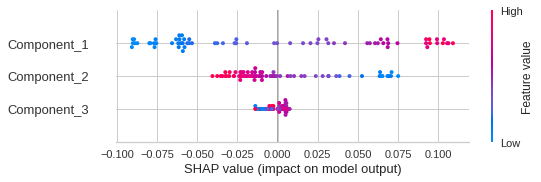

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_et_pca, plot='summary')


In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=4, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0002,
                     min_impurity_split=None, min_samples_leaf=5,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=130, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_et_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=4, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0002,
                     min_impurity_split=None, min_samples_leaf=5,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=130, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
